In [1]:
//import the needed libraries
import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import spark.implicits._

Intitializing Scala interpreter ...

Spark Web UI available at http://L2108019.bosonit.local:4040
SparkContext available as 'sc' (version = 3.1.2, master = local[*], app id = local-1634888954602)
SparkSession available as 'spark'


import org.apache.spark.sql.SparkSession
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import spark.implicits._


In [2]:
//create the SparkSession
val spark = SparkSession
 .builder
 .appName("Spark Ejs")
 .getOrCreate()

spark: org.apache.spark.sql.SparkSession = org.apache.spark.sql.SparkSession@3b1dea54


## Exercises from Chapter 2

a)

In [4]:
//route of the file to read
val route = "Desktop/Big Data/el_quijote.txt"

//loads the file into data
//Spark supports csv, json and text files(txt) 
val data = spark.read.format("text")
    .load(route)

data.count() //2186
//data.show    //shows the 20 top rows in tabular form
//data.show(5) //shows the selected number of rows in tabular form
//data.show(false) //shows the whole text (doesnt put "...", shows all)
//data.show(5, 5) //shows the selected number of rows, truncated to 25 character in horizontal
//data.head    //returns the first row
//data.first() //returns the first row
//data.head(5) //takes the number selected of rows from the start and puts them in an array
//data.take(5) //takes the number selected of rows from the start and puts them in an array (works as head(<n>) does)
//data.tail(5) //takes the number selected of rows from the end and puts them in an array


//There is no diference in the behaviour between head and first, the only difference is that head can take parametres and first can't
//head(<n>) and take(<n>) return the same thing



route: String = Desktop/Big Data/el_quijote.txt
data: org.apache.spark.sql.DataFrame = [value: string]
res1: Long = 2186


b)


In [11]:
val route = "Desktop/Big Data/DataSets Libro Spark/mnm_dataset.csv.txt"

val data = spark.read.format("csv")
    .option("header", "true")
    .load(route)

val totalByState = data.select("State", "Color", "Count")
    .groupBy("State", "Color")
    .agg(sum("Count").alias("Total"))
    .orderBy(asc("State"), asc("Total"))
totalByState.show()
//the function agg agregates a column to the current Dataset

+-----+------+--------+
|State| Color|   Total|
+-----+------+--------+
|   AZ|  Blue| 89971.0|
|   AZ|   Red| 90042.0|
|   AZ|Yellow| 90946.0|
|   AZ|Orange| 91684.0|
|   AZ| Green| 91882.0|
|   AZ| Brown| 92287.0|
|   CA|  Blue| 89123.0|
|   CA|Orange| 90311.0|
|   CA|   Red| 91527.0|
|   CA| Green| 93505.0|
|   CA| Brown| 95762.0|
|   CA|Yellow|100956.0|
|   CO|   Red| 89465.0|
|   CO|Orange| 90971.0|
|   CO|  Blue| 93412.0|
|   CO| Brown| 93692.0|
|   CO| Green| 93724.0|
|   CO|Yellow| 95038.0|
|   NM|  Blue| 90150.0|
|   NM| Green| 91160.0|
+-----+------+--------+
only showing top 20 rows



route: String = Desktop/Big Data/DataSets Libro Spark/mnm_dataset.csv.txt
data: org.apache.spark.sql.DataFrame = [State: string, Color: string ... 1 more field]
totalByState: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [State: string, Color: string ... 1 more field]


In [18]:
totalByState.select("State", "Color", "Total")
    .groupBy("State")
    .agg(max("Total").alias("Max"))
    .orderBy(desc("State")).show()

+-----+--------+
|State|     Max|
+-----+--------+
|   WY| 94339.0|
|   WA| 96486.0|
|   UT| 91341.0|
|   TX| 95753.0|
|   OR| 94514.0|
|   NV| 93929.0|
|   NM| 94699.0|
|   CO| 95038.0|
|   CA|100956.0|
|   AZ| 92287.0|
+-----+--------+



In [27]:
data.select("State", "Color", "Count")
    .where(col("State") === "CA")
    .groupBy("State", "Color")
    .agg(sum("Count").alias("Total"))
    .orderBy(desc("Total")).show()

+-----+------+--------+
|State| Color|   Total|
+-----+------+--------+
|   CA|Yellow|100956.0|
|   CA| Brown| 95762.0|
|   CA| Green| 93505.0|
|   CA|   Red| 91527.0|
|   CA|Orange| 90311.0|
|   CA|  Blue| 89123.0|
+-----+------+--------+



In [25]:
data.select("State", "Color", "Count")
    .where(col("State") === "NV" || col("State") === "TX" || col("State") === "CA" || col("State") === "CO")
    .groupBy("State", "Color")
    .agg(sum("Count").alias("Total"))
    .orderBy(asc("State"),asc("Color"))
    .show()

+-----+------+--------+
|State| Color|   Total|
+-----+------+--------+
|   CA|  Blue| 89123.0|
|   CA| Brown| 95762.0|
|   CA| Green| 93505.0|
|   CA|Orange| 90311.0|
|   CA|   Red| 91527.0|
|   CA|Yellow|100956.0|
|   CO|  Blue| 93412.0|
|   CO| Brown| 93692.0|
|   CO| Green| 93724.0|
|   CO|Orange| 90971.0|
|   CO|   Red| 89465.0|
|   CO|Yellow| 95038.0|
|   NV|  Blue| 90003.0|
|   NV| Brown| 92478.0|
|   NV| Green| 91331.0|
|   NV|Orange| 93929.0|
|   NV|   Red| 89346.0|
|   NV|Yellow| 91390.0|
|   TX|  Blue| 88466.0|
|   TX| Brown| 90736.0|
+-----+------+--------+
only showing top 20 rows



In [31]:
data.select("State", "Color", "Count")
    .groupBy("State", "Color")
    .agg(max("Count").alias("Max"), avg("Count").alias("Average"))
    .orderBy(asc("State"), asc("Color"))
    .show()

+-----+------+---+------------------+
|State| Color|Max|           Average|
+-----+------+---+------------------+
|   AZ|  Blue| 99| 54.99449877750611|
|   AZ| Brown| 99|54.350412249705535|
|   AZ| Green| 99| 54.82219570405728|
|   AZ|Orange| 99| 54.28300769686205|
|   AZ|   Red| 99|54.637135922330096|
|   AZ|Yellow| 99| 54.98548972188634|
|   CA|  Blue| 99| 55.59762944479102|
|   CA| Brown| 99|55.740395809080326|
|   CA| Green| 99|54.268717353453276|
|   CA|Orange| 99|54.502715751357876|
|   CA|   Red| 99| 55.26992753623188|
|   CA|Yellow| 99|  55.8693967902601|
|   CO|  Blue| 99| 55.11032448377581|
|   CO| Brown| 99| 56.57729468599034|
|   CO| Green| 99| 54.71336835960304|
|   CO|Orange| 99|55.402557856272836|
|   CO|   Red| 99|55.089285714285715|
|   CO|Yellow| 99| 55.22254503195816|
|   NM|  Blue| 99| 55.03663003663004|
|   NM| Brown| 99|55.392412566686424|
+-----+------+---+------------------+
only showing top 20 rows



------------------------

Now i will do the same queries but with the data as a temporal view

In [13]:
data.createOrReplaceTempView("mnm_table")

spark.sql("SELECT State, Color, sum(Count) as Total FROM mnm_table GROUP BY State, Color ORDER BY State ASC, Total ASC")
     .createOrReplaceTempView("totalByState_table")

spark.sql("SELECT * FROM totalByState_table").show()

+-----+------+--------+
|State| Color|   Total|
+-----+------+--------+
|   AZ|  Blue| 89971.0|
|   AZ|   Red| 90042.0|
|   AZ|Yellow| 90946.0|
|   AZ|Orange| 91684.0|
|   AZ| Green| 91882.0|
|   AZ| Brown| 92287.0|
|   CA|  Blue| 89123.0|
|   CA|Orange| 90311.0|
|   CA|   Red| 91527.0|
|   CA| Green| 93505.0|
|   CA| Brown| 95762.0|
|   CA|Yellow|100956.0|
|   CO|   Red| 89465.0|
|   CO|Orange| 90971.0|
|   CO|  Blue| 93412.0|
|   CO| Brown| 93692.0|
|   CO| Green| 93724.0|
|   CO|Yellow| 95038.0|
|   NM|  Blue| 90150.0|
|   NM| Green| 91160.0|
+-----+------+--------+
only showing top 20 rows



In [19]:
spark.sql("SELECT State, max(Total) as Max FROM totalByState_table GROUP BY State ORDER BY State DESC").show()

+-----+--------+
|State|     Max|
+-----+--------+
|   WY| 94339.0|
|   WA| 96486.0|
|   UT| 91341.0|
|   TX| 95753.0|
|   OR| 94514.0|
|   NV| 93929.0|
|   NM| 94699.0|
|   CO| 95038.0|
|   CA|100956.0|
|   AZ| 92287.0|
+-----+--------+



In [20]:
spark.sql("SELECT State, Color, sum(Count) as Total FROM mnm_table WHERE State = 'CA' GROUP BY State, Color ORDER BY Total DESC")
     .show()

+-----+------+--------+
|State| Color|   Total|
+-----+------+--------+
|   CA|Yellow|100956.0|
|   CA| Brown| 95762.0|
|   CA| Green| 93505.0|
|   CA|   Red| 91527.0|
|   CA|Orange| 90311.0|
|   CA|  Blue| 89123.0|
+-----+------+--------+



In [26]:
spark.sql("SELECT State, Color, sum(Count) as Total FROM mnm_table WHERE State = 'NV' OR State = 'TX' OR State = 'CO' OR State = 'CA' GROUP BY State, Color ORDER BY State ASC, Color ASC").show()

+-----+------+--------+
|State| Color|   Total|
+-----+------+--------+
|   CA|  Blue| 89123.0|
|   CA| Brown| 95762.0|
|   CA| Green| 93505.0|
|   CA|Orange| 90311.0|
|   CA|   Red| 91527.0|
|   CA|Yellow|100956.0|
|   CO|  Blue| 93412.0|
|   CO| Brown| 93692.0|
|   CO| Green| 93724.0|
|   CO|Orange| 90971.0|
|   CO|   Red| 89465.0|
|   CO|Yellow| 95038.0|
|   NV|  Blue| 90003.0|
|   NV| Brown| 92478.0|
|   NV| Green| 91331.0|
|   NV|Orange| 93929.0|
|   NV|   Red| 89346.0|
|   NV|Yellow| 91390.0|
|   TX|  Blue| 88466.0|
|   TX| Brown| 90736.0|
+-----+------+--------+
only showing top 20 rows



In [30]:
spark.sql("SELECT State, Color, max(Count) as Max, avg(Count) as Average FROM mnm_table GROUP BY State, Color ORDER BY State ASC, Color ASC").show()

+-----+------+---+------------------+
|State| Color|Max|           Average|
+-----+------+---+------------------+
|   AZ|  Blue| 99| 54.99449877750611|
|   AZ| Brown| 99|54.350412249705535|
|   AZ| Green| 99| 54.82219570405728|
|   AZ|Orange| 99| 54.28300769686205|
|   AZ|   Red| 99|54.637135922330096|
|   AZ|Yellow| 99| 54.98548972188634|
|   CA|  Blue| 99| 55.59762944479102|
|   CA| Brown| 99|55.740395809080326|
|   CA| Green| 99|54.268717353453276|
|   CA|Orange| 99|54.502715751357876|
|   CA|   Red| 99| 55.26992753623188|
|   CA|Yellow| 99|  55.8693967902601|
|   CO|  Blue| 99| 55.11032448377581|
|   CO| Brown| 99| 56.57729468599034|
|   CO| Green| 99| 54.71336835960304|
|   CO|Orange| 99|55.402557856272836|
|   CO|   Red| 99|55.089285714285715|
|   CO|Yellow| 99| 55.22254503195816|
|   NM|  Blue| 99| 55.03663003663004|
|   NM| Brown| 99|55.392412566686424|
+-----+------+---+------------------+
only showing top 20 rows



## Exercises from Chapter 3

a)

------Blog DataSet exercises------

In [98]:
//Sets the schema with a case class (only possible for DataSets, impossible to use in Python)
case class blogs(Id: Long, First: String, Last: String, URL: String, Published: String, Hits: Long, Campaigns: Array[String])

defined class blogs


In [99]:
//Load the Data from the example of the book
val route = "Desktop/Big Data/DataSets Libro Spark/blogs.json"

route: String = Desktop/Big Data/DataSets Libro Spark/blogs.json


In [96]:
//Sets the schema with DDL
val schemaDDL = " `Id` Int, `First` String, `Last` String, `URL` String, `Published` Date, `Hits` Int, `Campaigns` String"

//Converts the DDL schema to a StructType schema
val schema = StructType.fromDDL(schemaDDL)

//Creates a DataFrame with the data from the file and the schema defined with DDL
val blogs_df = spark.read.schema(schema).json(route)

schemaDDL: String = " `Id` Int, `First` String, `Last` String, `URL` String, `Published` Date, `Hits` Int, `Campaigns` String"
schema: org.apache.spark.sql.types.StructType = StructType(StructField(Id,IntegerType,true), StructField(First,StringType,true), StructField(Last,StringType,true), StructField(URL,StringType,true), StructField(Published,DateType,true), StructField(Hits,IntegerType,true), StructField(Campaigns,StringType,true))
blogs_df: org.apache.spark.sql.DataFrame = [Id: int, First: string ... 5 more fields]


In [100]:
//Sets the schema with the DataFrame API
//The third parameter indicates if that field is nullable or not
val schema = StructType(Array(StructField("Id", IntegerType, false),
                        StructField("First", StringType, false),
                        StructField("Last", StringType, false),
                        StructField("URL", StringType, false), 
                        StructField ("Published", DateType, false),
                        StructField("Hits", IntegerType, false),
                        StructField("Campaigns", ArrayType(StringType), false)))

//Creates a DataFrame with the data from the file and the schema defined with the DataFrame API
val blogs_df = spark.read.schema(schema).json(route)

schema: org.apache.spark.sql.types.StructType = StructType(StructField(Id,IntegerType,false), StructField(First,StringType,false), StructField(Last,StringType,false), StructField(URL,StringType,false), StructField(Published,DateType,false), StructField(Hits,IntegerType,false), StructField(Campaigns,ArrayType(StringType,true),false))
blogs_df: org.apache.spark.sql.DataFrame = [Id: int, First: string ... 5 more fields]


In [101]:
//The case class is defined is a cell above because if its defined in this same cell it doesn't work 

//Creates a DataSet with the data from the file and the case class
val blogs_df = spark.read.json(route).as[blogs]


blogs_df: org.apache.spark.sql.Dataset[blogs] = [Campaigns: array<string>, First: string ... 5 more fields]


In [102]:
//Show the Data 
blogs_df.show(false)

//Print the Schema
print(blogs_df.printSchema)

//Show the Schema
print(blogs_df.schema)

+----------------------------+---------+-----+---+-------+---------+-----------------+
|Campaigns                   |First    |Hits |Id |Last   |Published|Url              |
+----------------------------+---------+-----+---+-------+---------+-----------------+
|[twitter, LinkedIn]         |Jules    |4535 |1  |Damji  |1/4/2016 |https://tinyurl.1|
|[twitter, LinkedIn]         |Brooke   |8908 |2  |Wenig  |5/5/2018 |https://tinyurl.2|
|[web, twitter, FB, LinkedIn]|Denny    |7659 |3  |Lee    |6/7/2019 |https://tinyurl.3|
|[twitter, FB]               |Tathagata|10568|4  |Das    |5/12/2018|https://tinyurl.4|
|[web, twitter, FB, LinkedIn]|Matei    |40578|5  |Zaharia|5/14/2014|https://tinyurl.5|
|[twitter, LinkedIn]         |Reynold  |25568|6  |Xin    |3/2/2015 |https://tinyurl.6|
+----------------------------+---------+-----+---+-------+---------+-----------------+

root
 |-- Campaigns: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- First: string (nullable = true)

In [104]:
//Add a column called Big Hitters for people which hits are over 10000

// var bigHitters = blogs_df.select("*").where(col("Hits") > 10000).withColumn("BigHitters", lit(true)) 
//not quite good, only gets the rows that are BigHitters not all

var bigHitters = blogs_df.withColumn("BigHitters", expr("Hits > 10000")) //select is not needed
bigHitters.show()

//Concatenate First, Last and Id to create AuthorsId
var authorId = blogs_df.withColumn("AuthorsId", concat(col("First"), lit("_"), col("Last"), lit("-"), col("Id")))
authorId.show

+--------------------+---------+-----+---+-------+---------+-----------------+----------+
|           Campaigns|    First| Hits| Id|   Last|Published|              Url|BigHitters|
+--------------------+---------+-----+---+-------+---------+-----------------+----------+
| [twitter, LinkedIn]|    Jules| 4535|  1|  Damji| 1/4/2016|https://tinyurl.1|     false|
| [twitter, LinkedIn]|   Brooke| 8908|  2|  Wenig| 5/5/2018|https://tinyurl.2|     false|
|[web, twitter, FB...|    Denny| 7659|  3|    Lee| 6/7/2019|https://tinyurl.3|     false|
|       [twitter, FB]|Tathagata|10568|  4|    Das|5/12/2018|https://tinyurl.4|      true|
|[web, twitter, FB...|    Matei|40578|  5|Zaharia|5/14/2014|https://tinyurl.5|      true|
| [twitter, LinkedIn]|  Reynold|25568|  6|    Xin| 3/2/2015|https://tinyurl.6|      true|
+--------------------+---------+-----+---+-------+---------+-----------------+----------+

+--------------------+---------+-----+---+-------+---------+-----------------+---------------+
|   

bigHitters: org.apache.spark.sql.DataFrame = [Campaigns: array<string>, First: string ... 6 more fields]
authorId: org.apache.spark.sql.DataFrame = [Campaigns: array<string>, First: string ... 6 more fields]


------San Francisco Fire Department Exercises-------

In [3]:
//San Francisco Fire Deparment Exercises
//Set the schema
val schema = StructType(Array(StructField("CallNumber", IntegerType, true),
                              StructField("UnitID", StringType, true),
                              StructField("IncidentNumber", IntegerType, true),
                              StructField("CallType", StringType, true), 
                              StructField("CallDate", StringType, true), 
                              StructField("WatchDate", StringType, true),
                              StructField("CallFinalDisposition", StringType, true),
                              StructField("AvailableDtTm", StringType, true),
                              StructField("Address", StringType, true), 
                              StructField("City", StringType, true), 
                              StructField("Zipcode", IntegerType, true), 
                              StructField("Battalion", StringType, true), 
                              StructField("StationArea", StringType, true), 
                              StructField("Box", StringType, true), 
                              StructField("OriginalPriority", StringType, true), 
                              StructField("Priority", StringType, true), 
                              StructField("FinalPriority", IntegerType, true), 
                              StructField("ALSUnit", BooleanType, true), 
                              StructField("CallTypeGroup", StringType, true),
                              StructField("NumAlarms", IntegerType, true),
                              StructField("UnitType", StringType, true),
                              StructField("UnitSequenceInCallDispatch", IntegerType, true),
                              StructField("FirePreventionDistrict", StringType, true),
                              StructField("SupervisorDistrict", StringType, true),
                              StructField("Neighborhood", StringType, true),
                              StructField("Location", StringType, true),
                              StructField("RowID", StringType, true),
                              StructField("Delay", FloatType, true)))


//Load the data from the SF Fire Department
val route = "Desktop/Big Data/DataSets Libro Spark/Fire_Incidents.csv"

val data = spark.read.format("csv").option("header", "true").schema(schema).load(route)

//data.show(5, 25, true)


schema: org.apache.spark.sql.types.StructType = StructType(StructField(CallNumber,IntegerType,true), StructField(UnitID,StringType,true), StructField(IncidentNumber,IntegerType,true), StructField(CallType,StringType,true), StructField(CallDate,StringType,true), StructField(WatchDate,StringType,true), StructField(CallFinalDisposition,StringType,true), StructField(AvailableDtTm,StringType,true), StructField(Address,StringType,true), StructField(City,StringType,true), StructField(Zipcode,IntegerType,true), StructField(Battalion,StringType,true), StructField(StationArea,StringType,true), StructField(Box,StringType,true), StructField(OriginalPriority,StringType,true), StructField(Priority,StringType,true), StructField(FinalPriority,IntegerType,true), StructField(ALSUnit,BooleanType,true), St...


In [34]:
//Get the Incidents that are not Medical Incidents
//data.where(!col("CallType").like("Medical Incident")).show(5, 25, true)
data.filter(col("CallType") =!= "Medical Incident").show(5, 25, true)

-RECORD 0-----------------------------------------------
 CallNumber                 | 20110016                  
 UnitID                     | T13                       
 IncidentNumber             | 2003235                   
 CallType                   | Structure Fire            
 CallDate                   | 01/11/2002                
 WatchDate                  | 01/10/2002                
 CallFinalDisposition       | Other                     
 AvailableDtTm              | 01/11/2002 01:51:44 AM    
 Address                    | 2000 Block of CALIFORN... 
 City                       | SF                        
 Zipcode                    | 94109                     
 Battalion                  | B04                       
 StationArea                | 38                        
 Box                        | 3362                      
 OriginalPriority           | 3                         
 Priority                   | 3                         
 FinalPriority              | 3

In [8]:
//How many distinct CallTypes were recorded as the causes of the fire calls?

//data.select(countDistinct("CallType")).show(false)

print(data.select("CallType").distinct().count())
//This can't be done with "withColumn" because it expects as 2nd parameter a Column, not a number (the result of count)

30

In [9]:
//Rename the Column Delay to ResponseDelayedInMins and get the ones above 5

data.withColumnRenamed("Delay", "ResponseDelayedInMins").show(5, 25, true)

-RECORD 0-----------------------------------------------
 CallNumber                 | 20110016                  
 UnitID                     | T13                       
 IncidentNumber             | 2003235                   
 CallType                   | Structure Fire            
 CallDate                   | 01/11/2002                
 WatchDate                  | 01/10/2002                
 CallFinalDisposition       | Other                     
 AvailableDtTm              | 01/11/2002 01:51:44 AM    
 Address                    | 2000 Block of CALIFORN... 
 City                       | SF                        
 Zipcode                    | 94109                     
 Battalion                  | B04                       
 StationArea                | 38                        
 Box                        | 3362                      
 OriginalPriority           | 3                         
 Priority                   | 3                         
 FinalPriority              | 3

In [35]:
//Convert the columns CallDate, WatchDate, AvailableDtTm to DateType and name them IncidentDate, OnWatchDate, AvailableDtTS

var dataRenamed = data.withColumnRenamed("CallDate", "IncidentDate").withColumn("IncidentDate", to_date(col("IncidentDate"), "MM/dd/yyyy"))
    .withColumnRenamed("WatchDate", "OnWatchDate").withColumn("OnWatchDate", to_date(col("OnWatchDate"), "MM/dd/yyyy"))
    .withColumnRenamed("AvailableDtTm", "AvailableDtTS").withColumn("AvailableDtTS", to_timestamp(col("AvailableDtTS"), "MM/dd/yyyy hh:mm:ss a"))

dataRenamed.show(5, 25, true)

//The years in format must be like "yyyy", if you put "YYYY" it won't be recognized as years and it will provoke and error
//The final "a" is needed because some dates are like "01/11/2002 01:51:44 AM"
//The format specified is the one that has the data, not the format you want to give the data

-RECORD 0-----------------------------------------------
 CallNumber                 | 20110016                  
 UnitID                     | T13                       
 IncidentNumber             | 2003235                   
 CallType                   | Structure Fire            
 IncidentDate               | 2002-01-11                
 OnWatchDate                | 2002-01-10                
 CallFinalDisposition       | Other                     
 AvailableDtTS              | 2002-01-11 01:51:44       
 Address                    | 2000 Block of CALIFORN... 
 City                       | SF                        
 Zipcode                    | 94109                     
 Battalion                  | B04                       
 StationArea                | 38                        
 Box                        | 3362                      
 OriginalPriority           | 3                         
 Priority                   | 3                         
 FinalPriority              | 3

dataRenamed: org.apache.spark.sql.DataFrame = [CallNumber: int, UnitID: string ... 26 more fields]


In [12]:
//Obtain the years in which an incident has happened (years must only show once)
dataRenamed.select(year($"IncidentDate")).distinct().orderBy(asc("IncidentDate")).show()


+------------------+
|year(IncidentDate)|
+------------------+
|              2000|
|              2001|
|              2002|
|              2003|
|              2004|
|              2005|
|              2006|
|              2007|
|              2008|
|              2009|
|              2010|
|              2011|
|              2012|
|              2013|
|              2014|
|              2015|
|              2016|
|              2017|
|              2018|
+------------------+



In [13]:
//What were the most common types of fire calls?? (Order the calls by their popularity)
dataRenamed.select("*").groupBy("CallType").count().orderBy(desc("count")).show(10)


+--------------------+------+
|            CallType| count|
+--------------------+------+
|    Medical Incident|113794|
|      Structure Fire| 23319|
|              Alarms| 19406|
|   Traffic Collision|  7013|
|Citizen Assist / ...|  2524|
|               Other|  2166|
|        Outside Fire|  2094|
|        Vehicle Fire|   854|
|Gas Leak (Natural...|   764|
|        Water Rescue|   755|
+--------------------+------+
only showing top 10 rows



In [14]:
//Compute the sum of alarms, the average response time, and the minimum and maximum response times to all fire calls
dataRenamed.select(sum("NumAlarms").alias("Number of alarms"),
                   avg("Delay").alias("Average response time"),
                   max("Delay").alias("Maximum response time"),
                   min("Delay").alias("Minimum response time")).show()

//You can't do this in another way (with withColum or agg)


+----------------+---------------------+---------------------+---------------------+
|Number of alarms|Average response time|Maximum response time|Minimum response time|
+----------------+---------------------+---------------------+---------------------+
|          176170|    3.892364154521585|              1844.55|          0.016666668|
+----------------+---------------------+---------------------+---------------------+



In [15]:
//What were all the different types of fire calls in 2018?
dataRenamed.where(year($"IncidentDate") === 2018).select("CallType").distinct().show()


+--------------------+
|            CallType|
+--------------------+
|Elevator / Escala...|
|              Alarms|
|Odor (Strange / U...|
|Citizen Assist / ...|
|              HazMat|
|           Explosion|
|        Vehicle Fire|
|  Suspicious Package|
|               Other|
|        Outside Fire|
|   Traffic Collision|
|       Assist Police|
|Gas Leak (Natural...|
|        Water Rescue|
|   Electrical Hazard|
|      Structure Fire|
|    Medical Incident|
|          Fuel Spill|
|Smoke Investigati...|
|Train / Rail Inci...|
+--------------------+



In [44]:
//What months within the year 2018 saw the highest number of fire calls?
dataRenamed.where(year($"IncidentDate") === 2018)
           .withColumn("Month of call", month($"IncidentDate"))
           .groupBy("CallType", "Month of call")
           .agg(sum("NumAlarms").alias("Number of alarms"))
           .orderBy(desc("Number of alarms"))/*.drop("Month of call")*/.show(5)


+-------------+----------------+----------------+
|Month of call|        CallType|Number of alarms|
+-------------+----------------+----------------+
|            5|Medical Incident|             769|
|           10|Medical Incident|             725|
|            8|Medical Incident|             698|
|            3|Medical Incident|             695|
|            1|Medical Incident|             692|
+-------------+----------------+----------------+
only showing top 5 rows



In [41]:
//Which neighborhood in San Francisco generated the most fire calls in 2018?
dataRenamed.where(year($"IncidentDate") === 2018)
           .groupBy("CallType", "Neighborhood")
           .agg(sum("NumAlarms").alias("Number of alarms"))
           .orderBy(desc("Number of alarms"))
           .select("Neighborhood", "Number of alarms").show(10)


+--------------------+----------------+
|        Neighborhood|Number of alarms|
+--------------------+----------------+
|          Tenderloin|            1094|
|     South of Market|             829|
|             Mission|             693|
|Financial Distric...|             481|
|Bayview Hunters P...|             330|
|    Western Addition|             248|
|     Sunset/Parkside|             240|
|            Nob Hill|             188|
|        Hayes Valley|             186|
| Castro/Upper Market|             176|
+--------------------+----------------+
only showing top 10 rows



In [56]:
//Which neighborhoods had the worst response times to fire calls in 2018?
dataRenamed.where(year($"IncidentDate") === 2018)
           .groupBy("CallType", "Neighborhood")
           .agg(max("Delay").alias("Response"))
           .orderBy(desc("Response"))
           .select("Neighborhood", "Response").show(10)


+--------------------+---------+
|        Neighborhood| Response|
+--------------------+---------+
|           Chinatown|491.26666|
|Financial Distric...|406.63333|
|          Tenderloin|340.48334|
|      Haight Ashbury|175.86667|
|Bayview Hunters P...|    155.8|
|Financial Distric...|135.51666|
|     Pacific Heights|129.01666|
|        Potrero Hill|    109.8|
|        Inner Sunset|106.13333|
|     South of Market| 94.71667|
+--------------------+---------+
only showing top 10 rows



In [74]:
//Which week in the year in 2018 had the most fire calls?
dataRenamed.where(year($"IncidentDate") === 2018)
           .groupBy(weekofyear($"IncidentDate"))
           .agg(sum("NumAlarms").alias("Number of alarms"))
           .orderBy(desc("Number of alarms"))
           .show(10)

//You can't do this either in the select, groupBy functions: "Number of alarms", weekofyear($"IncidentDate")
//Because those methods are overloaded to accept one form or another, not both at the same time
//You can drop a column created with withColumn or agg after 

+------------------------+----------------+
|weekofyear(IncidentDate)|Number of alarms|
+------------------------+----------------+
|                      22|             259|
|                      40|             255|
|                      43|             252|
|                      25|             250|
|                       1|             246|
|                      44|             244|
|                      13|             243|
|                      32|             243|
|                      11|             243|
|                       5|             236|
+------------------------+----------------+
only showing top 10 rows



In [35]:
//Is there a correlation between neighborhood, zip code, and number of fire calls?
dataRenamed.groupBy("Neighborhood", "Zipcode")
           .agg(sum("NumAlarms").alias("Number of alarms"))
           .orderBy(desc("Zipcode"), desc("Number of alarms"))
           .show(50)

//Each neighborhood has a series of zipcodes assigned. For example: The Neighborhood Mission has 94114, 94110 and 94103
//But some neighborhoods have the same zipcode as others so it not a way to identify them
//I haven't found a correlation between them


+--------------------+-------+----------------+
|        Neighborhood|Zipcode|Number of alarms|
+--------------------+-------+----------------+
|         Mission Bay|  94158|             842|
|        Potrero Hill|  94158|              38|
|                None|  94158|              11|
|   Visitacion Valley|  94134|            2442|
|             Portola|  94134|            1688|
|           Excelsior|  94134|             407|
|Bayview Hunters P...|  94134|             292|
|        McLaren Park|  94134|             171|
|                None|  94134|              29|
|         North Beach|  94133|            3711|
|           Chinatown|  94133|            1874|
|        Russian Hill|  94133|             448|
|            Nob Hill|  94133|             238|
|           Lakeshore|  94132|            2663|
|Oceanview/Merced/...|  94132|             846|
|     Sunset/Parkside|  94132|             555|
|  West of Twin Peaks|  94132|             262|
|          Twin Peaks|  94131|          

In [95]:
//How can we use Parquet files or SQL tables to store this data and read it back?
dataRenamed.write.format("parquet").save("Desktop/Big Data/DataSets Cacheados/dataRenamed.parquet")
//dataRenamed.write.format("parquet").saveAsTable("<DB>.<Table>")

------------------------
b)

In [7]:
//Read the CSV and obtain the schema by default
val route = "Desktop/Big Data/DataSets Libro Spark/Fire_Incidents.csv"

var data = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(route)
data.show(5, 25, true)

-RECORD 0-----------------------------------------------
 CallNumber                 | 20110016                  
 UnitID                     | T13                       
 IncidentNumber             | 2003235                   
 CallType                   | Structure Fire            
 CallDate                   | 01/11/2002                
 WatchDate                  | 01/10/2002                
 CallFinalDisposition       | Other                     
 AvailableDtTm              | 01/11/2002 01:51:44 AM    
 Address                    | 2000 Block of CALIFORN... 
 City                       | SF                        
 Zipcode                    | 94109                     
 Battalion                  | B04                       
 StationArea                | 38                        
 Box                        | 3362                      
 OriginalPriority           | 3                         
 Priority                   | 3                         
 FinalPriority              | 3

route: String = Desktop/Big Data/DataSets Libro Spark/Fire_Incidents.csv
data: org.apache.spark.sql.DataFrame = [CallNumber: int, UnitID: string ... 26 more fields]


------------
c)

In the definition of a field of a schema, what does the Boolean argument (last argument) stands for? 
For example: StructField('Delay', FloatType(), True)

The last argument indicates if that field is nullable or not


-----------
d)
DataSet vs DataFrame

A DataFrame is a equivalent to DataSet[Row], meaning that is an generic Dataset.
This is the exact part of the Spark where that relation is defined

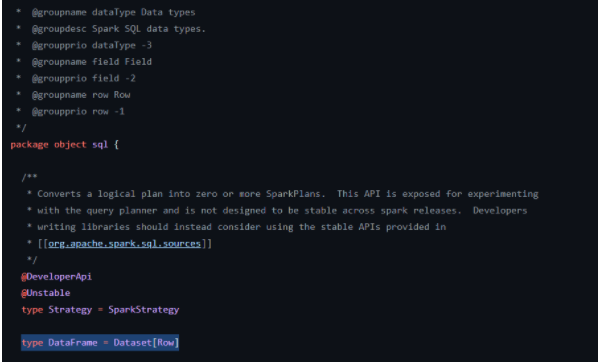

----------
e)


In [59]:
//Save the data in different formats:

//JSON
data.write.format("json").mode(SaveMode.ignore).save("Desktop/Big Data/DataSets Cacheados/dataEx3_JSON1.json")

//CSV
data.write.format("csv").mode(SaveMode.ignore).save("Desktop/Big Data/DataSets Cacheados/dataEx3_CSV.csv")

//AVRO
//data.write.format("avro").mode(SaveMode.ignore).save("Desktop/Big Data/DataSets Cacheados/dataEx3_AVRO.avro")//Since Spark 2.4.0 it's possible to save as AVRO without external jars.

org.apache.spark.sql.AnalysisException:  Failed to find data source: avro. Avro is built-in but external data source module since Spark 2.4. Please deploy the application as per the deployment section of "Apache Avro Data Source Guide".

f)

Check the files saved in the previous part

-Why are there more than 1 file?

    Because Spark writes data as multiple part files in parallel (one-part file for each partition)
    
-How can you obtain the number of partitions of a DataFrame?

    To obtain the partitions we have to convert the DataFrame to an RDD and then we will be able to get them.
        <DataFrame>.rdd.getNumPartitions
        <DataFrame>.rdd.partitions.length
        <DataFrame>.rdd.partitions.size

-Which ways exist to modify the number of partitions of a DataFrame?
            
    Using the method coalesce(<nº of new partitions>) of the DataFrame API. You can also use the method repartition(<nº of new partitions>), but its not as eficient as the previous method.

-Modify the number of partitions to 1 and save the files again

In [8]:
data = data.coalesce(1)

//JSON
data.write.format("json").mode("overwrite").save("Desktop/Big Data/DataSets Cacheados/dataEx3_JSON1.json")

//CSV
data.write.format("csv").mode("overwrite").save("Desktop/Big Data/DataSets Cacheados/dataEx3_CSV.csv")

data: org.apache.spark.sql.DataFrame = [CallNumber: int, UnitID: string ... 26 more fields]


---------------
## Exercises from Chapter 4



b)
GlobalTempView vs TempView

A global temporal view is visible in all the SparkSessions of a given Cluster, to refer to one you have to write this: 
global_temp.view_name

A temporal or session-scopped view is a view that is only visible in the SparkSessions where its created. 

But both types of views are temporal and "dissapears" when the Spark application ends.



I haven't done the exercises of the sections a and c because they are too basic and I have already done something similar (read files in different formats)
